In [37]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, f1_score , cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_excel('./dataset.xls')

In [3]:
df

,Unnamed: 0,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24
1,1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02
2,2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,NaN,2016-01-06,2016-12-07
3,3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054.0,2016-01-06,2016-09-11
4,4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180.0,2016-01-07,2016-01-31
...,...,...,...,...,...,...,...,...,...,...
7795,7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590.0,2018-12-30,2019-07-22
7796,7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284.0,2018-12-30,2019-05-26
7797,7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300.0,2018-12-31,2019-04-15
7798,7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284.0,2018-12-31,2019-05-16


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns = ['customer', 'agent', 'sales_agent_emailID', 'contact_emailID', 'stage', \
       'product', 'close_value', 'created_date', 'close_date']

In [6]:
won_mean = df[df.stage=='Won'].close_value.mean()
lost_mean = df[df.stage=='Lost'].close_value.mean()
overall_mean = df.close_value.mean()


df.loc[(df.close_value.isna()) & (df.stage=='Won') ,'close_value'] = won_mean
df.loc[(df.close_value.isna()) & (df.stage=='Lost') ,'close_value'] = lost_mean
df.loc[(df.close_value.isna()) & (df.stage=='In Progress') ,'close_value'] = overall_mean

In [7]:
df.drop(['customer', 'agent','sales_agent_emailID', 'contact_emailID' ], axis=1, inplace=True)


In [8]:
df = df[df.stage!='In Progress']

In [9]:
df = df.join(pd.get_dummies(df['product'])).drop('product', axis=1)

In [10]:
df['diff_months'] = (df.close_date - df.created_date).dt.components.days/30.0

In [11]:
df.drop(['created_date', 'close_date'], axis=1, inplace=True)

In [12]:
df

,stage,close_value,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,diff_months
0,Won,1255.000000,0,0,1,0,0,0,0,4.700000
1,Won,45.000000,0,0,0,0,0,0,1,10.100000
2,Lost,1335.458057,0,0,0,0,0,0,1,11.200000
4,Won,3180.000000,0,0,0,0,0,1,0,0.800000
5,Won,517.000000,0,1,0,0,0,0,0,11.166667
...,...,...,...,...,...,...,...,...,...,...
7293,Won,5085.000000,0,0,0,0,1,0,0,0.533333
7294,Won,555.000000,0,1,0,0,0,0,0,8.033333
7297,Lost,5169.000000,0,0,0,1,0,0,0,6.366667
7298,Won,4880.000000,0,0,0,1,0,0,0,1.233333


In [13]:
x_train,x_test , y_train,y_test = train_test_split(df.drop('stage', axis=1), df.stage, stratify= df.stage,\
                                                   test_size=0.2, random_state=101)

# Random Forest Classifier

In [14]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [15]:
y_pred = clf.predict(x_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.96      0.90      0.93       395
         Won       0.95      0.98      0.96       748

    accuracy                           0.95      1143
   macro avg       0.96      0.94      0.95      1143
weighted avg       0.95      0.95      0.95      1143



In [17]:
features = dict(zip(x_train.columns,clf.feature_importances_)) 
features = dict(sorted(features.items(), key=lambda item: item[1], reverse=True))

In [18]:
features

{'close_value': 0.7057760871504362,
 'diff_months': 0.13352884679550986,
 'MG Advanced': 0.03324107095630138,
 'GTX Basic': 0.028742802045415565,
 'MG Special': 0.028133620081400194,
 'GTX Plus Basic': 0.025186046667775613,
 'GTXPro': 0.023271887945052357,
 'GTX Plus Pro': 0.02065338964240262,
 'GTK 500': 0.001466248715706167}

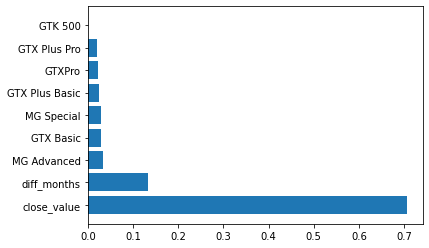

In [19]:
fig = plt.barh(list(features.keys()),list(features.values()))

# Decision Tree Classifer

In [20]:
dsc = DecisionTreeClassifier()
dsc.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dsc.predict(x_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.96      0.93      0.94       395
         Won       0.97      0.98      0.97       748

    accuracy                           0.96      1143
   macro avg       0.96      0.96      0.96      1143
weighted avg       0.96      0.96      0.96      1143



# K Neighbors classifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
from datetime import datetime

In [25]:
st = datetime.now()
y_pred = knn.predict(x_test)
datetime.now() - st 

datetime.timedelta(microseconds=64996)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.85      0.90      0.87       395
         Won       0.94      0.92      0.93       748

    accuracy                           0.91      1143
   macro avg       0.90      0.91      0.90      1143
weighted avg       0.91      0.91      0.91      1143



# Naive bayes

In [27]:
nbc = MultinomialNB()
nbc.fit(x_train,y_train)

MultinomialNB()

In [28]:
y_pred = nbc.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.43      0.63      0.51       395
         Won       0.74      0.57      0.64       748

    accuracy                           0.59      1143
   macro avg       0.59      0.60      0.58      1143
weighted avg       0.64      0.59      0.60      1143



### I choose random forest classifier because it is robust to outliers (such as GTK 500) and it's performance is good.

In [114]:
analysis_dataframe = df.copy()
analysis_dataframe['stage'] = analysis_dataframe.stage.apply(lambda val : 1 if val == 'Won' else 0)

<AxesSubplot:>

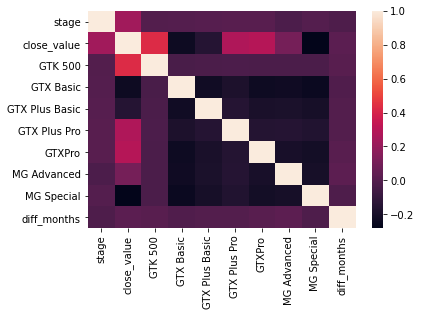

In [115]:
sns.heatmap(analysis_dataframe.corr())

In [96]:
clf = RandomForestClassifier(class_weight='balanced',n_jobs=-1, n_estimators=75, random_state=0, criterion='entropy')
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=75, n_jobs=-1, random_state=0)

In [97]:
y_pred = clf.predict(x_test)

In [98]:
le = LabelEncoder()
le.fit(y_test)

LabelEncoder()

## Because dataset is imbalanced, f1 measure is better than accuracy
### I think cohen kappa is better than f1-score, but it was not in measurements!

In [99]:
print(accuracy_score(y_test,y_pred))

0.9518810148731408


In [100]:
print(f1_score(le.transform(y_test), le.transform(y_pred)))

0.9639344262295082


<AxesSubplot:xlabel='stage', ylabel='count'>

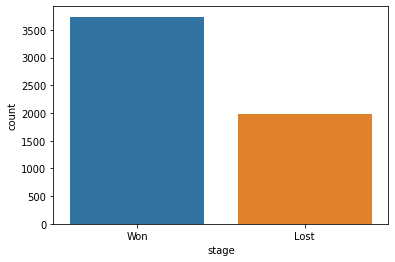

In [35]:
sns.countplot(data=df, x='stage')

In [101]:
cohen_kappa_score(y_pred,y_test)

0.8917395549723343

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Lost       0.96      0.89      0.93       395
         Won       0.95      0.98      0.96       748

    accuracy                           0.95      1143
   macro avg       0.96      0.94      0.95      1143
weighted avg       0.95      0.95      0.95      1143



In [103]:
confusion_matrix(y_test,y_pred )

array([[353,  42],
       [ 13, 735]], dtype=int64)

<AxesSubplot:>

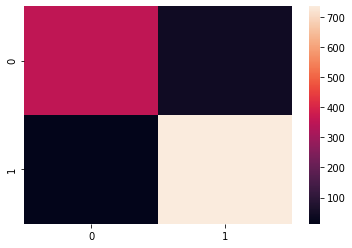

In [105]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [106]:
import joblib

In [107]:
joblib.dump(clf, './best_model.joblib')

['./best_model.joblib']